# The Monty Hall Problem


#### Premise: 

The Monty Hall problem originated in a gameshow in the 1960's, in which the host Mr. Hall would present the contestant with three large doors; there was a highly coveted prize behind one of the doors, while goats waited behind the other two. After the contestant picked a door, Mr. Hall opens one of the remaining two doors to reveal a goat, and prompts the contestant with a question: would you like to stick with the initial door chosen, or switch to the remaining closed door?

From a purely statistical perspective, the answer is certainly to switch -- let me prove this to you. 

#### The Math behind the problem: 

For the sake of setting up the problem, let's assume that the doors are labeled 1,2, and 3, and the contestant initially chooses door 1; after choosing, Mr. Hall opens door 2 to reveal a goat. Then, the problem becomes much more intuitive after answering the following question: given that the contestant chose door 1, what is the probability that Mr. Hall opens door 2? Using this information, we should find the probability that the prize is behind the door 3, the remaining closed door. 


#### Setting up the problem:

##### Given: the contestant chooses door 1 initially; Mr. Hall responds by opening door 2.

X = {1, 2, 3}

Y = {II}

P(X): P( 1 )  =  P( 2 )  =  P( 3 )  =  1/3 : The probability that the prize is behind door X

P(Y): P( II ) : The probability that Mr. Hall reveals a goat in door Y, given that door 1 was chosen initially. 

P(Y|X) : The probability that Mr. Hall reveals a goat in door Y, given that the prize is in door X
##### Deliverable: P( 3 | II ) : Probability that the prize is in door 3, given that Mr. Hall opened door II.

P( II | 1 ) : Probability that Mr. Hall opens door two, given that the prize is in door 1  = 1/2

p( II | 2 ) : Probability that Mr. Hall opens door two, given that the prize is in door 2 and the contestant chose door 1 initially = 0

P( II | 3 ) : Probability that Mr. Hall opens door two, given that the prize is in door 3 and the contestant chose door 1 initially = 1

##### Intuitively, this should make sense:

- If the contestant chooses door 1 initially and the prize is in door 1, then Mr. Hall could choose to reveal a goat in either door 2 or door 3; thus, the probability of him opening the second door in this case is 1/2.


- If the contestant chooses door 1 initially and the prize is in door 2, Mr. Hall would have to reveal the goat in door 3 since he can't reveal the prize; thus, the probability of him opening the second door in this case is 0.


- If the contestant chooses door 1 initially and the prize is in door 3, Mr. Hall must open door two to reveal the goat since he can't reveal the prize in door 3; thus, the probability of him opening the second door in this case is 1.

##### With all the parameters established, this problem becomes a simple application of the Bayes' Theorem:

P( A | B ) = ( P( B | A ) * P( A ) ) / P( B )

P( 3 | II ) = ( P( II | 3) * P( 3) ) / P( II )

= [ P( II | 3) * P( 3) ] / [ P( II | 1) * P( 1 ) + P( II | 2 ) * P( 2 ) + P( II | 3 ) * P( 3 ) ]

= ( 1 * 1/3 ) / ( 1/2 * 1/3 + 1/3 * 0 + 1 * 1/3 )

= ( 1 / 3) / (1 / 2) 

= 2/3


##### Conclusion: Thus, contestants who switch doors when prompted are expected to win 66% of the time.

## Monty Hall Problem Simulation

In [1]:
import random
import numpy as np
import pandas as pd

In [18]:
def monty_hall_rechoose_sim(numdoors, trials):
    rechoose_win_count = 0
    rechoose_lose_count = 0
    win_list = []
    lose_list = []
    trials_list = []
    trials_list.extend(range(1,trials+1))
    #print(available_doors)
    for i in range(trials):
        
        available_doors = []
        available_doors.extend(range(1,numdoors + 1))
    
        win_door = random.randint(1,numdoors)
        first_door_opened = random.randint(1, numdoors)
        #print(win_door, first_door_opened)
        while (len(available_doors) > 2):
            removed_door = random.choice(available_doors)
            
            if (removed_door == win_door or removed_door == first_door_opened):
                continue
            else:
                available_doors.remove(removed_door)
        #print(available_doors)
        
        final_door = available_doors
        final_door.remove(first_door_opened)
        
        if final_door[0] == win_door:
            rechoose_win_count += 1
        else:
            rechoose_lose_count += 1
        
        win_list.append(rechoose_win_count)
        lose_list.append(rechoose_lose_count)
    
    #creating results dataframe
    results = pd.DataFrame(
        {'wins' : win_list,
        'losses': lose_list,
        'trials': trials_list})
    
    # print("in", trials, "trials and", numdoors, "total doors, the player wins", win_pct, "% of the time when rechoosing doors")
    
    return results

In [14]:
n3_door_results = monty_hall_rechoose_sim(3,1000)
win_pct = 100 * max(n3_door_results['wins'])/max(n3_door_results['trials'])
lose_pct = 100 * max(n3_door_results['losses']/max(n3_door_results['trials']))

In [17]:
print("Wins when switching doors through 1000 trials: {}".format(max(n3_door_results['wins'])))
print("Losses when switching doors through 1000 trials: {}".format(max(n3_door_results['losses'])))

Wins when switching doors through 1000 trials: 660
Losses when switching doors through 1000 trials: 340


# Visualizing the results

In [3]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

Text(800, 325, 'losses: 34%')

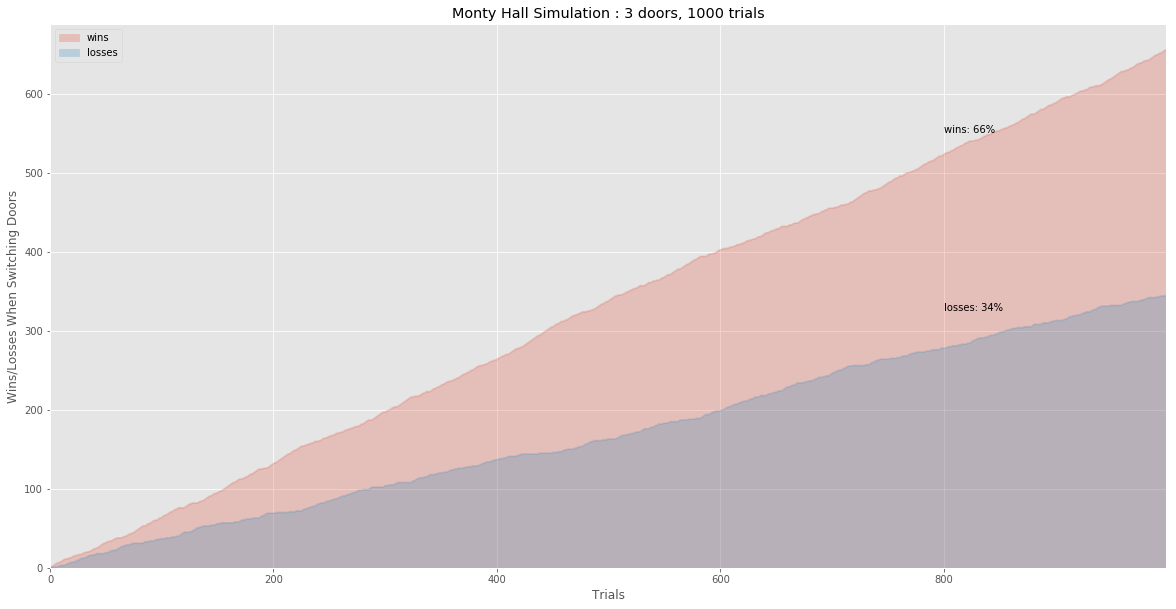

In [9]:
n3_win_loss = n3_door_results.drop(columns = 'trials')

n3_win_loss.plot(kind = 'area',
                 alpha = 0.25,
                stacked = False,
                figsize = (20,10))
plt.xlabel('Trials')
plt.ylabel('Wins/Losses When Switching Doors')
plt.title('Monty Hall Simulation : 3 doors, 1000 trials')

plt.text(800,550, "wins: {}%".format(round(win_pct)))
plt.text(800,325, "losses: {}%".format(round(lose_pct)))

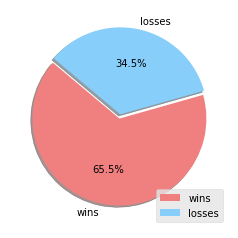

In [7]:
pie_labels = ['wins','losses']
pie_sizes = [max(n3_door_results['wins']),max(n3_door_results['losses'])]

plt.pie(pie_sizes,
        explode=[0,0.05],
        labels=pie_labels,
        colors=['lightcoral','lightskyblue'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=140)

plt.legend(labels = pie_labels, loc="lower right")
plt.show()

# Conclusion & Discussion

As the simulation and math suggest, contestants who choose to switch doors when given the option win around 66% of the time. This is very intuitive when we think about the question from a different angle. The option Mr. Hall gives his contestants can essentially be rephrased as the following: would you like to stick with the initial door you chose, or would you prefer to open the remaining doors instead? This allows the contestant to effectively double his odds of winning from 1/3 to 2/3.

To clarify, consider the same problem scaled to 100 doors instead. One's odds of getting the prize with their initial guess is 1%; however, switching doors when prompted increases the odds to 99%, as you're essentially given the option to open 99 doors instead of a single one. In this case, one is almost guarenteed to win when switching doors.